In [ ]:
import nltk
nltk.download()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer

In [3]:
spam = pd.read_csv('spam.csv',encoding="ISO-8859-1")
spam= spam[['v1', 'v2']]

In [4]:
#renaming the columns
spam.columns=['label', 'message']

In [5]:
spam.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
spam.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
#Getting the counts
spam['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

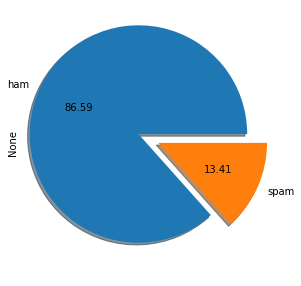

In [8]:
#Visualising the target variable
myexplode = [0.2, 0]
spam.groupby('label').size().plot(kind= 'pie', autopct='%.2f', figsize=(5,5), explode = myexplode, shadow= True)

## Data pre-processing

In [12]:
words_removed = list(stopwords.words('english'))+list(punctuation)
final_corpus = []
stemmer = LancasterStemmer()

for i in range(len(spam)):
  word = word_tokenize(spam['message'][i].lower())
  word = [stemmer.stem(y) for y in word if y not in words_removed]
  j = " ".join(word)
  final_corpus.append(j)

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
vector = tfidf.fit_transform(final_corpus)
print(type(vector))
X = vector.toarray()
y=spam['label']

<class 'scipy.sparse.csr.csr_matrix'>


In [15]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Testing models

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score,KFold

In [18]:
models=[]
models.append(('svm',SVC(gamma='auto')))
models.append(('lr',LogisticRegression()))
models.append(('XGB',XGBClassifier()))
models.append(('decision tree',DecisionTreeClassifier()))
models.append(('naive bayes',GaussianNB()))
models.append(('Random Forest',RandomForestClassifier()))
models.append(('Adaboost',AdaBoostClassifier()))
models.append(('knn',KNeighborsClassifier()))
models.append(('XGB',XGBClassifier()))

In [19]:
from sklearn.metrics import classification_report
for name,model in models:
  print('-----------------------------------------------------')
  print(name)
  model.fit(X_train,y_train)
  predict=model.predict(X_test)
  print(classification_report(predict,y_test))
  print('-----------------------------------------------------')

-----------------------------------------------------
svm


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         ham       1.00      0.86      0.93      1839
        spam       0.00      0.00      0.00         0

    accuracy                           0.86      1839
   macro avg       0.50      0.43      0.46      1839
weighted avg       1.00      0.86      0.93      1839

-----------------------------------------------------
-----------------------------------------------------
lr
              precision    recall  f1-score   support

         ham       0.99      0.94      0.97      1676
        spam       0.62      0.95      0.75       163

    accuracy                           0.94      1839
   macro avg       0.81      0.95      0.86      1839
weighted avg       0.96      0.94      0.95      1839

-----------------------------------------------------
-----------------------------------------------------
XGB
              precision    recall  f1-score   support

         ham       1.00      0.97      0.98      1631
        spam  

<b>The best model was Random Forest with an accuracy of 98% and precision of 100%</b>